In [2]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from simulator import Simulator
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from Graph import GenericGraph

# Path analysis in the graphs
- Measuring the shortest distance between pairs of nodes randomly sampled from the graph 

In [4]:
from Graph import GenericGraph
from networkx.exception import NetworkXNoPath
# Path Length Analysis
# Randomly sample a set of 10,000 nodes and find the shortest path between them


def length_analysis(graph_type):
    paths_lens = []
    longest_path = []
    no_path = []
    country_graph = GenericGraph(graph_type=graph_type).graph
    for i in range(20000):
        node1 = random.choice(list(country_graph.nodes.keys()))
        node2 = random.choice(list(country_graph.nodes.keys()))
        try:
            path = nx.shortest_path(country_graph, node1, node2)
            paths_lens.append(len(path))
            if len(longest_path) == 0 or len(path) > len(longest_path):
                longest_path = path
        except NetworkXNoPath:
            no_path.append((node1, node2))
    # Make the plot of frequency of path lengths 
    path_length_counts = {}
    for length in paths_lens:
        if length in path_length_counts:
            path_length_counts[length] += 1
        else:
            path_length_counts[length] = 1

    plt.bar(path_length_counts.keys(), path_length_counts.values())
    plt.xlabel('Path Length')
    plt.ylabel('Number of Node Pairs')
    plt.title('Frequency of Path Lengths')
    plt.show()

    # print(f'Longest path: {longest_path}')
    print("LOngest Path")
    for node in longest_path:
        print(f'{node}',end=' -> ')


country


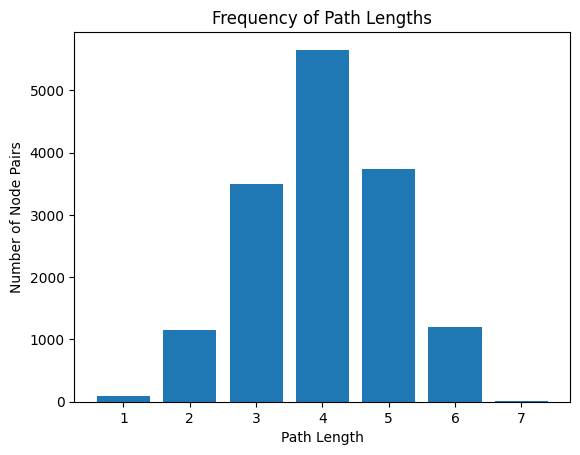

LOngest Path
iraq -> qatar -> réunion -> nepal -> luxembourg -> guam -> malta -> 

In [5]:
length_analysis('country')

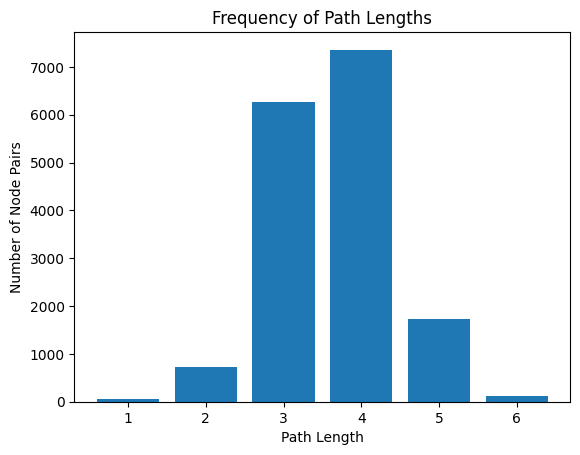

Yancheng Jiangsu -> Ufa -> Anyang -> Gaziantep -> Phoenix -> Xuzhou -> 

In [4]:
length_analysis('city')

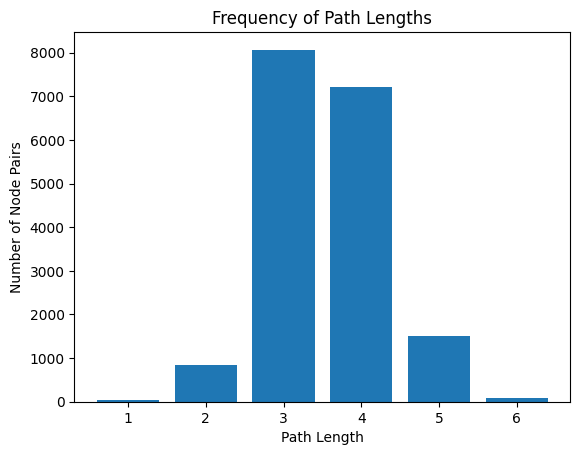

togo -> oman -> Nanjing -> Gaziantep -> Phoenix -> Xinbei -> 

In [5]:
length_analysis('both')

In [ ]:
import math
g = GenericGraph(graph_type='both').graph
num_nodes = len(g.nodes)
print(f'Number of nodes in both graph: {num_nodes}')
avg_neighbors = sum(g.degree(node) for node in g.nodes )/num_nodes
print(f'Average number of neighbors for both graph: {avg_neighbors}')

# print log(n)/log(k)
print("Expected average path length for random graph with the same number of nodes and every node having edges equal to ")
print(math.log(num_nodes)/math.log(avg_neighbors))

Number of nodes in both graph: 725
Average number of neighbors for both graph: 63.11448275862069
1.5889627704671256


Most nodes are not more than 6 degrees apart  (With majority of nodes being about 4 units apart). The graph is 

# Game analysis
## Foreword : Random vs Random

A game where both players randomly select one of the legal neighbors. This could be how a typical game between two human players might proceed (assuming they know all the place names and have not thought of any algorithm yet!).
The analysis of random graphs may reveal valuable insights some of which could possile guide us in the development of a good strategy. 

In [8]:
# Test1 - Random Choice vs Random choice
def RandomChoice(cur_country, graph):
    # find unvisted neighbor nodes and return a random node
    if (cur_country == "start"):
        return random.choice(list(graph.graph.nodes))
    neighbors = list(graph.graph.neighbors(cur_country))
    unvisited_neighbors = [neighbor for neighbor in neighbors if graph.visited[neighbor] == 0]

    if unvisited_neighbors:
        return random.choice(unvisited_neighbors)
    else:
        return None

With this I want to set a random baseline for comaprision - which I assume would be 50% chance of victory in a random game. But does starting first provide some kind of advantage? 

In [139]:
def test1(graph_type):
    num_a_victories = 0
    for _ in range(1000):
        result = Simulator(RandomChoice,RandomChoice,graph_type=graph_type)
        if result.winner == 'A':
            num_a_victories += 1    
    percetage_a_victories = num_a_victories / 1000
    print(f'Percentage of starter victories: {percetage_a_victories}')

test1(graph_type='country')

Percentage of starter victories: 0.488


Alright! Pretty close to the expected 50%. 

In [4]:
def both_random(graph_type):
    cnt_c = defaultdict(int)
    cnt_len = []
    shortest_game = []
    longest_game = []
    for _ in range(1000):
        result = Simulator(RandomChoice, RandomChoice,graph_type=graph_type)
        cnt_c[result.country[-1]] += 1
        cnt_len.append(result.len)
        if len(shortest_game)==0 or result.len < len(shortest_game):
            shortest_game = result.gameplay
        if result.len > len(longest_game):
            longest_game = result.gameplay

    # Name the plot - give it a title
    plt.title('Shortest game')
    plt.xlabel('Last letter of trapping country')
    plt.ylabel('Number of games ending with that letter')
    plt.bar(cnt_c.keys(), cnt_c.values())
    # plt.savefig('game_ends_with.png')
    plt.show()
    plt.clf()

    plt.figure(figsize=(12, 6)) 
    plt.title('Game Length')
    plt.xlabel('Game number')
    plt.ylabel('Number of moves')
    indices = [i for i in range(len(cnt_len))]
    plt.plot(indices, cnt_len, marker='o')
    # plt.savefig('game_length.png')
    average_game_len = sum(cnt_len) / len(cnt_len)
    plt.show()
    print(f'Shortest game: {len(shortest_game)}')
    for node in shortest_game:
        print(f'{node}',end=' -> ')
    print(f'\nLongest game: {len(longest_game)}')
    for node in longest_game:
        print(f'{node}',end=' -> ')
    print(f'\nAverage game length: {average_game_len}')







The below cells visualise:
1. The letter which ran out of nodes; i.e the last letter of the last country in the gameplay
2. The length of the games sampled

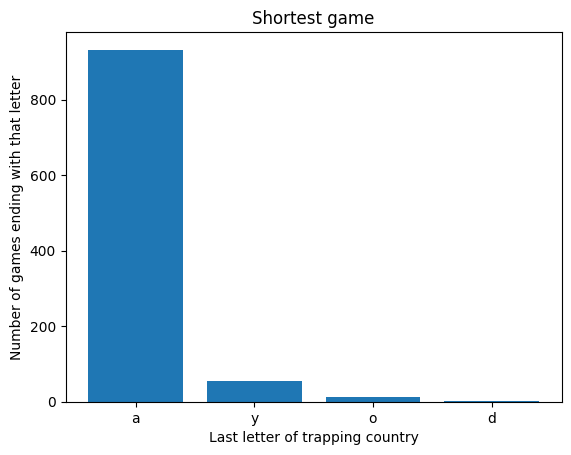

<Figure size 640x480 with 0 Axes>

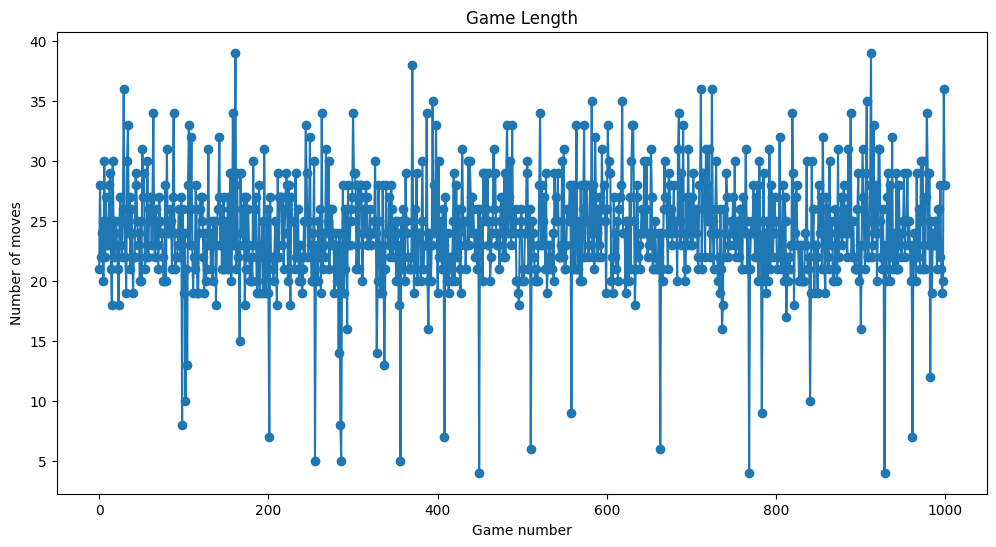

Shortest game: 4
peru -> uruguay -> yemen -> norway -> 
Longest game: 38
guadeloupe -> estonia -> austria -> antigua and barbuda -> albania -> azerbaijan -> niue -> eswatini -> italy -> yemen -> niger -> russian federation -> northern mariana islands -> south africa -> andorra -> afghanistan -> new zealand -> djibouti -> iceland -> denmark -> kosovo -> oman -> netherlands -> sweden -> nauru -> united states minor outlying islands -> syrian arab republic -> cook islands -> slovakia -> american samoa -> argentina -> aruba -> armenia -> antarctica -> algeria -> australia -> anguilla -> angola -> 
Average game length: 24.054


In [142]:
both_random('country')

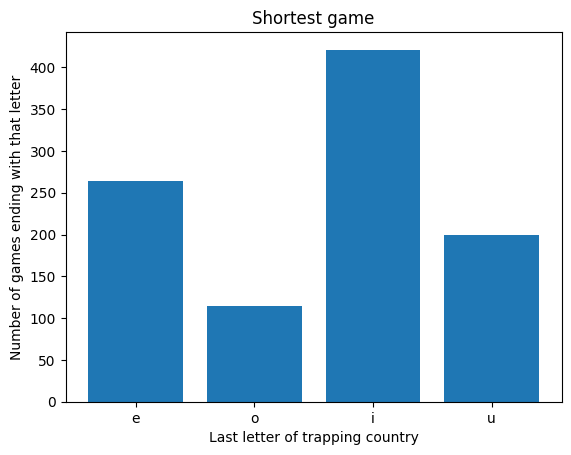

<Figure size 640x480 with 0 Axes>

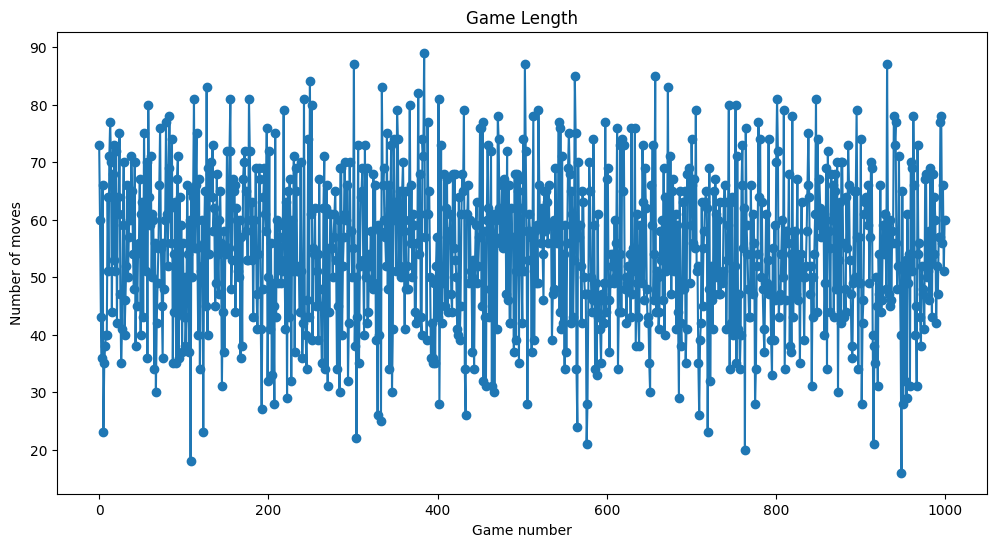

Shortest game: 15
Kano -> Ottawa -> Astana -> Anshan -> Natal -> Lilongwe -> Ekurhuleni -> Izmir -> Recife -> Esfahan -> Nagoya -> Adelaide -> Edmonton -> Nairobi -> Indore -> 
Longest game: 88
Quetta -> Allahabad -> Depok -> Kunming -> Gwangju -> Urumqi -> Islamabad -> Daqing -> Gaoxiong -> Glasgow -> Wuhan -> Nanjing -> Guatemala City -> Yaounde -> Edmonton -> Naples -> Srinagar -> Ranchi -> Incheon -> Natal -> Lusaka -> Anyang -> Guadalajara -> Auckland -> Dongying -> Goiania -> Amman -> N-Djamena -> Asuncion -> Nizhniy Novgorod -> Dublin -> Nashik -> Kinshasa -> Aba -> Abuja -> Accra -> Alexandria -> Ad-Dammam -> Manila -> Astana -> Adelaide -> Esfahan -> Nanchang -> Grande Vitoria -> Ahmedabad -> Douala -> Ankara -> Aleppo -> Osaka -> Adana -> Abu Dhabi -> Ibadan -> New York City -> Yancheng Jiangsu -> Uyo -> Omsk -> Kuala Lumpur -> Rizhao -> Onitsha -> Algiers -> Shantou -> Ufa -> Amsterdam -> Montevideo -> Ottawa -> Agra -> Anshan -> Nanchong -> Guangzhou -> Ulaanbaatar -> Ruian

In [16]:
both_random('city')

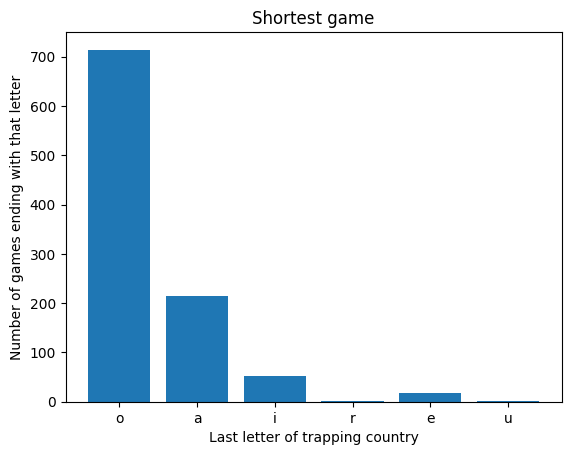

<Figure size 640x480 with 0 Axes>

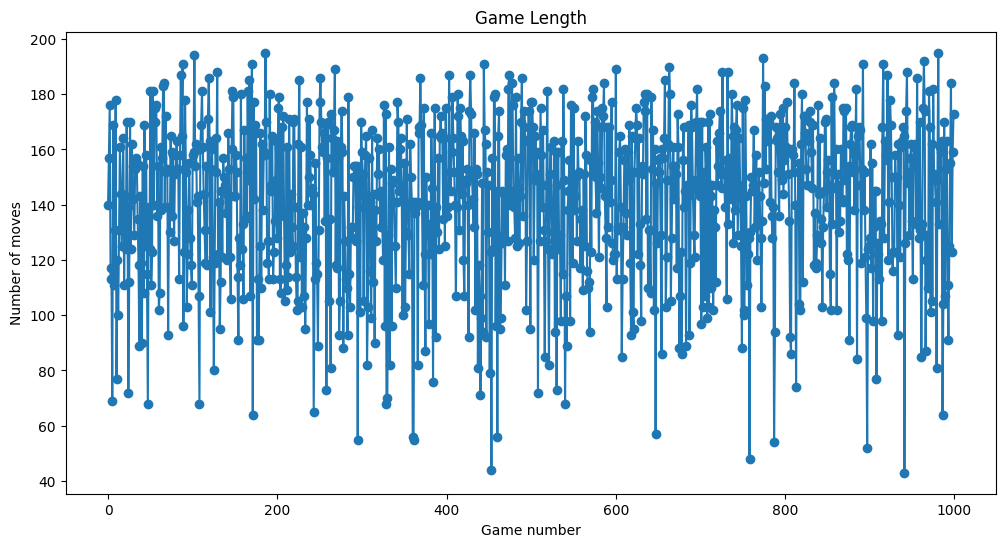

Shortest game: 43
togo -> Ottawa -> Abidjan -> Nanchong -> gibraltar -> Rio de Janeiro -> oman -> Ningbo -> Ouagadougou -> uganda -> Agra -> Astana -> antarctica -> Algiers -> Shiyan -> New York City -> Yichang -> Ganzhou -> Uyo -> Onitsha -> Ahmedabad -> Douala -> Aleppo -> Omsk -> kenya -> Abomey-Calavi -> israel -> Lusaka -> Amman -> nigeria -> Aligarh -> hong kong -> Gujranwala -> armenia -> Aba -> argentina -> Amritsar -> Rosario -> Osaka -> afghanistan -> Nouakchott -> Thrissur -> Rizhao -> 
Longest game: 194
Budapest -> Tiruppur -> russian federation -> northern mariana islands -> Suzhou -> uzbekistan -> nigeria -> antigua and barbuda -> algeria -> azerbaijan -> new zealand -> Durban -> Nanning -> Guilin -> niger -> réunion -> nicaragua -> afghanistan -> Nizhniy Novgorod -> Dubai -> indonesia -> albania -> Abomey-Calavi -> india -> Ad-Dammam -> monaco -> oman -> netherlands -> Surabaya -> australia -> Astana -> Anshan -> Niamey -> yemen -> Naples -> Srinagar -> Rajkot -> Tangsha

In [ ]:
# This takes a while to run as the sampling is done 1000 times. 
both_random('both')

# Insight
All games ended with a place which had a 'vowel' at the end. This is not surprising as a lot of places end with a vowel, few begin with them. Out of 227 countries considered, 42 begin with a vowel and 139 end with vowels. Similar numbers hold for city and both graph. The vowel nodes are bound to get replenished quicker. 

Surprising however is the fact that most Country games eneded with 'a' (above 90%), but not a single one of the 1000 City games did so. 

A more succinct analysis of this observation is presented later. 

The average game length more than doubled for every level. 

# Algorithm vs Random

## 1. Analysis based on In-Degree Out-degree 

#### Insight
The shortest game between random players for country graph was `yemen -> norway` (when I ran it). Upon closer inspection, this is actually a sure way to victory (if you get to start the game).

Say, you go first. Start with a country ending with y (Germany, Paraguay etc) -> The opponent is forced to say Yemen;  Norway ends the game. 

If you go second, you would have to be carefully chose based on the opponent's choices. As long as Yemen(or a 'similar' country - what is meant by similar is clarified later) is not used, try to trap the opponent there. 

Infact, the desired property with 'Yemen' is the fact that 'y' has higher in-degree and low out-degree; i.e the ratio of indegree/outdegree is higher - many places ending with that letter, fewer places starting with that letter. Call it the degree ratio. 

`degree ratio of a letter = Number of places ending with that letter / Number of places beginning with that letter` 

This gives us a good heuristic for choosing the next country: 

• For each possible neighbor (the next node you could pick), look at its last letter.  

• Count how many neighbors that letter has (i.e., your opponent’s possible moves next turn at the current point of time in the ).

• Choose the neighbor that yeilds the highest degree ratio for your opponent.   

(Turns out, this approach can be beaten by a much simpler and more intuitive idea later.)

### Choose Countries based on Degree ratio

Function to define score of each letter as the degree ratio

In [177]:
# Score places based on indegree/outdegree ratio of the starting letter 
def score_calculator(graph_type, print_score="false"):
    countries = GenericGraph(graph_type=graph_type).graph.nodes
    end_counts = defaultdict(int)
    start_counts = defaultdict(int)

    for country in countries:
        end_letter = country[-1].lower()
        start_letter = country[0].lower()
        end_counts[end_letter] += 1
        start_counts[start_letter] += 1
    score = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    for letter in letters:
        score[letter] = 0

    for letter in set(end_counts.keys()).union(set(start_counts.keys())):
        end_count = end_counts[letter]
        start_count = start_counts[letter]
        if start_count > 0:
            score[letter] = (end_count / start_count)
        else:
            score[letter] = float('inf')  # Handle division by zero
    
    return score


DegreeChoice: Choose a legal neighbor with the highest degree ratio score for the last letter of the neighbor

In [178]:
country_score = score_calculator('country')
city_score = score_calculator('city')
both_score = score_calculator('both')



def DegreeChoice(cur_country, graph):
    if cur_country == "start":
        return random.choice(list(graph.graph.nodes))
    else:
        if graph.graph_type == 'country':
            score = country_score
        elif graph.graph_type == 'city':
            score = city_score
        else:
            score = both_score
        neighbors = list(graph.graph.neighbors(cur_country))
        unvisited_neighbors = [neighbor for neighbor in neighbors if graph.visited[neighbor] == 0]
        if unvisited_neighbors:
            m = -1
            next_country = None
            for n in unvisited_neighbors:
                if score[n[-1].lower()] > m:
                    m = score[n[0].lower()]
                    next_country = n
            # update the relevant score after considering next country
            return next_country
        else:
            return None


In [180]:
#RUN THE PREVIOUS CELL TO RESET SCORE BEFORE RUNNING THIS CELL AGAIN
# Change the type of the graph
graph_type = 'both'
iterations = 100

def algo1_vs_random():
    num_a_victories = 0
    for _ in range(iterations):
        result = Simulator(DegreeChoice, RandomChoice, graph_type=graph_type)
        if result.winner == 'A':
            num_a_victories += 1
    percetage_a_victories = (num_a_victories/iterations)*100
    print(f'Percentage of victories: {percetage_a_victories}')

algo1_vs_random()

Percentage of victories: 75.0


##### This is great! 
Inspite of arbitary selection of the starting country, the percentage of victories is around 70% for country graph and between 75 to 85 percent for 'city' and 'both' graphs.. :)  
This is good performace for such a simple algorithm. 
-> To do: Analyse startegies for a good starting country 

### Aside: Predicting the output of random vs random
A similar effect was observed in the 'random vs random' games of all three graphs - kindly see the plot of the number of games vs Letter that ran out of valid places(the last letter of the last country of the game).  The  letter to run out of countries(vowels in all 3 cases) had a high degree ratio - not necessarily the highest. This could be due to uniform sampling: the game is unlikely to pivot to places where the ratio could be high but the actual denominator, numerator themselves are smaller. Therefore, predicting the output for the dead-end letter in random vs random would also have to account for the probabilty of ever reaching the place, and it makes sense to use indegree of the letter to estimate this.  
(See code below). Multiply the score with the indegree or the end_cnt in the code(number of places you can say to reach that letter). Then find a factor to raise the importance of the start_cnt (number of places starting with that letter). In the code I chose 1.5. Turns out the predictions are in the same order as the outputs (the exact ratio is off though). 
Preiciton for the `city` graph : i, e, u, o which matches the observed values from the graph. 

Note: This could have been purely by chance. I tried to make the prediction fit the output and therefore the parameter choice (the 1.5 in the code below) is very biased. 


In [3]:
# Score places based on indegree/outdegree ratio of the starting letter 
def score_calculator(graph_type, print_score="false"):
    countries = GenericGraph(graph_type=graph_type).graph.nodes
    end_counts = defaultdict(int)
    start_counts = defaultdict(int)

    for country in countries:
        end_letter = country[-1].lower()
        start_letter = country[0].lower()
        end_counts[end_letter] += 1
        start_counts[start_letter] += 1
    score = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    for letter in letters:
        score[letter] = 0

    for letter in set(end_counts.keys()).union(set(start_counts.keys())):
        end_count = end_counts[letter]
        start_count = start_counts[letter]
        if start_count > 0:
            # ########################################################################33
            """This is the most important part - the prediction"""
            score[letter] = (end_count / start_count**1.5) * end_count
        else:
            score[letter] = float('inf') 
            ########################################################################
    sorted_ratios = sorted(score.items(), key=lambda x: x[1], reverse=True)

    print(graph_type)
    # Print the sorted ratios
    for letter, ratio in sorted_ratios:
        print(f"Letter '{letter}': Score - Ratio of ending to starting = {ratio:.2f}")
    

score_calculator('city', print_score="true")


city
Letter 'i': Score - Ratio of ending to starting = 176.98
Letter 'e': Score - Ratio of ending to starting = 173.21
Letter 'u': Score - Ratio of ending to starting = 171.12
Letter 'o': Score - Ratio of ending to starting = 91.59
Letter 'g': Score - Ratio of ending to starting = 46.35
Letter 'n': Score - Ratio of ending to starting = 40.25
Letter 'a': Score - Ratio of ending to starting = 33.92
Letter 'r': Score - Ratio of ending to starting = 18.86
Letter 'y': Score - Ratio of ending to starting = 7.92
Letter 'd': Score - Ratio of ending to starting = 1.90
Letter 's': Score - Ratio of ending to starting = 1.52
Letter 'z': Score - Ratio of ending to starting = 1.14
Letter 't': Score - Ratio of ending to starting = 1.08
Letter 'h': Score - Ratio of ending to starting = 0.80
Letter 'w': Score - Ratio of ending to starting = 0.71
Letter 'm': Score - Ratio of ending to starting = 0.65
Letter 'l': Score - Ratio of ending to starting = 0.61
Letter 'v': Score - Ratio of ending to starting =

Call the letter that we would give the opponent as a 'target'; so if you say India in your turn, 'a' would be the target.  
Motivated by the yemen example, I cared about degree ratio and not just out-degree of target. The idea was to capture not just how many options the opponent has with the target at present, but also to include the liklihood of coming back to that target: we use the ratio of `countries ending with the target` (as a blunt estimate of the liklihood of coming back) and `countries beginning with the target` (minimise the options that the opponent has). But to simply use indegree as an estimate of the liklihood of coming back to the target is crude. 
A more important issue even if the estimate was assumed reasonable which was overlooked earlier: the higher liklihood means you are too are more prone to get the target sometime in the future. 

This prompts a simpler approach where the choice is based only on minimising the denominator of the degree ratio.... That is, 


Idea: Pick the move that leaves your opponent with the fewest moves.  

• For each possible neighbor (the next node you could pick), look at its last letter.  

• Count how many neighbors that letter has (i.e., your opponent’s possible moves next turn at the current point of time in the ).

• Choose the neighbor that yields the smallest out-degree for your opponent.  

In [153]:


def minimize_opponent_outdegree(current_country, graph):
    if current_country == "start":
        return random.choice(list(graph.graph.nodes))
    neighbors = list(graph.graph.neighbors(current_country))
    if not neighbors:
        return None

    best_neighbor = None
    best_score = float('inf')
    
    for n in neighbors:
        if graph.visited[n]:
            continue
        opp_moves = 0
        for neighbor in graph.graph.neighbors(n):
            if graph.visited[neighbor] == 0:
                opp_moves += 1
        if opp_moves < best_score:
            best_score = opp_moves
            best_neighbor = n
    
    return best_neighbor


In [157]:
graph_type = 'both'
iterations = 100

def algo1_vs_random():
    num_a_victories = 0
    for _ in range(iterations):
        result = Simulator(minimize_opponent_outdegree, RandomChoice, graph_type=graph_type)
        if result.winner == 'A':
            num_a_victories += 1
    percetage_a_victories = (num_a_victories/iterations)*100
    print(f'Percentage of victories: {percetage_a_victories}')

algo1_vs_random()

Percentage of victories: 92.0


This gives a victory for a whopping 85 - 95% of the times.

In [6]:
pr = nx.pagerank(GenericGraph(graph_type='both').graph)


def combined_heuristic(current_country, graph):
    neighbors = list(graph.graph.neighbors(current_country))
    unvisited_neighbors = [neighbor for neighbor in neighbors if graph.visited[neighbor] == 0]
    if not neighbors:
        return None

    best_neighbor = None
    best_score = float('inf')
    
    for n in unvisited_neighbors:
        # Opponent out-degree
        opp_moves = graph.graph.out_degree(n)
        # Opponent's potential PageRank advantage
        opp_pr = pr.get(n, 0)
        # Weighted combination (tune weights as you wish, e.g. 1.0 for each)
        score = opp_moves + opp_pr  
        
        if score < best_score:
            best_score = score
            best_neighbor = n
    
    return best_neighbor

In [9]:
graph_type = 'both'
iterations = 100

def algo1_vs_random():
    num_a_victories = 0
    for _ in range(iterations):
        result = Simulator(combined_heuristic, RandomChoice, graph_type=graph_type)
        if result.winner == 'A':
            num_a_victories += 1
    percetage_a_victories = (num_a_victories/iterations)*100
    print(f'Percentage of victories: {percetage_a_victories}')

algo1_vs_random()

Percentage of victories: 86.0
